In [1]:
import pandas as pd

In [22]:
df = pd.read_csv('segmentation_data.csv')
df

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


#### ID：顯示客戶的唯一標識。

#### Sex：
0：男性        
1：女性        

#### Marital status：客戶的婚姻狀況。
0：單人        
1：非單身（離婚/分居/已婚/喪偶）        

#### Age：客戶的年齡（以年為單位），計算方法為當年減去創建數據集時客戶的出生年份
18 最小值（數據集中觀察到的最低年齡）        
76 最大值（數據集中觀察到的最高年齡）        

#### Education：客戶的教育水準。
0：其他/未知        
1：高中        
2：大學        
3：研究生院        

#### Income：客戶以美元自我報告的年收入。
35832 最小值（數據集中觀察到的最低收入）        
309364 最大值（數據集中觀察到的最高收入）        

#### Occupation ：客戶的職業類別。
0：失業 / unskilled        
1：skilled employee / official        
2：management / self-employed / highly qualified employee / officer        

#### Settlement size：客戶居住城市的規模。
0：小城市        
1：中等城市        
2：大城市        

In [24]:
# 改資歷型態
df[['Sex', 'Marital status', 'Education', 'Occupation', 'Settlement size']] = df[['Sex', 'Marital status', 'Education', 'Occupation', 'Settlement size']].astype(object)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               2000 non-null   int64 
 1   Sex              2000 non-null   object
 2   Marital status   2000 non-null   object
 3   Age              2000 non-null   int64 
 4   Education        2000 non-null   object
 5   Income           2000 non-null   int64 
 6   Occupation       2000 non-null   object
 7   Settlement size  2000 non-null   object
dtypes: int64(3), object(5)
memory usage: 125.1+ KB


In [25]:
# 刪除ID
df = df.drop('ID', axis = 1)
df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0
1996,1,1,27,1,117744,1,0
1997,0,0,31,0,86400,0,0
1998,1,1,24,1,97968,0,0


In [26]:
df.columns

Index(['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation',
       'Settlement size'],
      dtype='object')

In [27]:
# 標準化
from sklearn.preprocessing import StandardScaler

# 將類型以外的特徵全取出
X = df[['Age', 'Income']]

scaler = StandardScaler()
Z_sk = scaler.fit_transform(X)

df[['Age', 'Income']] = Z_sk
df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,2.653614,2,0.097524,1,2
1,1,1,-1.187132,1,0.782654,1,2
2,0,0,1.117316,1,-0.833202,0,0
3,0,0,0.775916,1,1.328386,1,1
4,0,0,1.458716,1,0.736932,1,1
...,...,...,...,...,...,...,...
1995,1,0,0.946616,1,0.067471,0,0
1996,1,1,-0.760382,1,-0.084265,1,0
1997,0,0,-0.418983,0,-0.906957,0,0
1998,1,1,-1.016432,1,-0.603329,0,0


In [28]:
# 顯示標準化特徵的平均與標準差
df_stats = df.describe().loc[['mean', 'std']]

# 四捨五入小數點後兩位
df_stats.round(2)

,Age,Income
mean,0.0,0.0
std,1.0,1.0


In [29]:
# one-hot encoding編碼
df_encoded = pd.get_dummies(df)
df_encoded

/var/folders/3s/m6xq7_ln4fn4l8kj852xnk7m0000gn/T/ipykernel_46064/2576278926.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_encoded = pd.get_dummies(df)
/var/folders/3s/m6xq7_ln4fn4l8kj852xnk7m0000gn/T/ipykernel_46064/2576278926.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_encoded = pd.get_dummies(df)
/var/folders/3s/m6xq7_ln4fn4l8kj852xnk7m0000gn/T/ipykernel_46064/2576278926.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_encoded = pd.get_dummies(df)
/var/folders/3s/m6xq7_ln4fn4l8kj852xnk7m0000gn/T/ipykernel_46064/2576278926.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequenc

,Age,Income,Sex_0,Sex_1,Marital status_0,Marital status_1,Education_0,Education_1,Education_2,Education_3,Occupation_0,Occupation_1,Occupation_2,Settlement size_0,Settlement size_1,Settlement size_2
0,2.653614,0.097524,1,0,1,0,0,0,1,0,0,1,0,0,0,1
1,-1.187132,0.782654,0,1,0,1,0,1,0,0,0,1,0,0,0,1
2,1.117316,-0.833202,1,0,1,0,0,1,0,0,1,0,0,1,0,0
3,0.775916,1.328386,1,0,1,0,0,1,0,0,0,1,0,0,1,0
4,1.458716,0.736932,1,0,1,0,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.946616,0.067471,0,1,1,0,0,1,0,0,1,0,0,1,0,0
1996,-0.760382,-0.084265,0,1,0,1,0,1,0,0,0,1,0,1,0,0
1997,-0.418983,-0.906957,1,0,1,0,1,0,0,0,1,0,0,1,0,0
1998,-1.016432,-0.603329,0,1,0,1,0,1,0,0,1,0,0,1,0,0


## MDS 降維

In [30]:
# from sklearn.datasets import load_digits
from sklearn.manifold import MDS
# 指定降到二維空間
embedding = MDS(n_components=2)
mds_trans = embedding.fit_transform(df_encoded)
mds_trans

/Users/liaoyayun/opt/anaconda3/envs/web_scraping/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


array([[ 2.75909167, -1.83799718],
       [-1.10801317,  2.05225021],
       [ 0.22095926, -1.89755358],
       ...,
       [-0.96103627, -1.81743465],
       [-2.09284102, -0.25724697],
       [-1.6002594 , -2.00286999]])

# K-MEANS

/Users/liaoyayun/opt/anaconda3/envs/web_scraping/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/liaoyayun/opt/anaconda3/envs/web_scraping/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/liaoyayun/opt/anaconda3/envs/web_scraping/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/liaoyayun/opt/anaconda3/envs/web_scraping/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

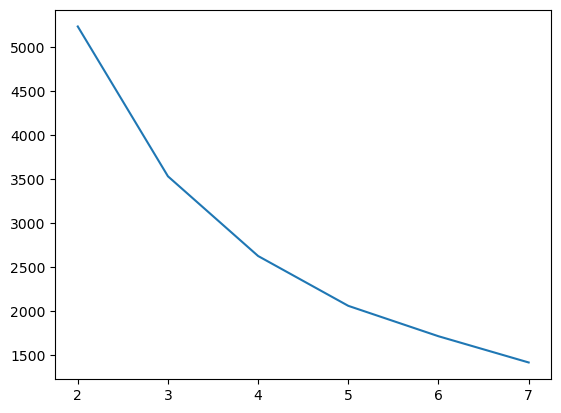

In [31]:
# Elbow Curve Method 手肘法
# 找最佳K值（分幾群）
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

clusters = list(range(2, 8))
ssd = []
for num_clusters in clusters:
    model_clus = KMeans(n_clusters=num_clusters, max_iter=150, random_state= 50)
    model_clus.fit(mds_trans)
    ssd.append(model_clus.inertia_)

plt.plot(clusters, ssd);

In [32]:
# Silhouette Score Method
# 找最佳K值，越接近1結果越好
from sklearn.metrics import silhouette_score
range_n_cluster = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_cluster:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50,random_state= 100)
    kmeans.fit(mds_trans)
    
    cluster_labels = kmeans.labels_
    
    silhouette_avg = silhouette_score(mds_trans, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
# 分7群最接近1
# For n_clusters=2, the silhouette score is 0.3820826883411754
# For n_clusters=3, the silhouette score is 0.3795721409733997
# For n_clusters=4, the silhouette score is 0.379822662371619
# For n_clusters=5, the silhouette score is 0.3813549407183791
# For n_clusters=6, the silhouette score is 0.38902446978595795
# For n_clusters=7, the silhouette score is 0.39487841042932587
# For n_clusters=8, the silhouette score is 0.38765058901335525

/Users/liaoyayun/opt/anaconda3/envs/web_scraping/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/liaoyayun/opt/anaconda3/envs/web_scraping/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/liaoyayun/opt/anaconda3/envs/web_scraping/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=2, the silhouette score is 0.38164507105648604
For n_clusters=3, the silhouette score is 0.3783167428092329
For n_clusters=4, the silhouette score is 0.3785292430453085


/Users/liaoyayun/opt/anaconda3/envs/web_scraping/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/liaoyayun/opt/anaconda3/envs/web_scraping/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/liaoyayun/opt/anaconda3/envs/web_scraping/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=5, the silhouette score is 0.3815921852990176
For n_clusters=6, the silhouette score is 0.3902066341395855
For n_clusters=7, the silhouette score is 0.396793565096347
For n_clusters=8, the silhouette score is 0.3881199202940165


/Users/liaoyayun/opt/anaconda3/envs/web_scraping/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [33]:
# KMeans 7 clusters
cluster = KMeans(n_clusters=7, random_state= 111)
cluster.fit(mds_trans)

/Users/liaoyayun/opt/anaconda3/envs/web_scraping/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=7, random_state=111)

In [34]:
pd.Series(cluster.labels_).value_counts()

4    452
5    350
1    331
3    281
6    267
2    203
0    116
dtype: int64

In [39]:
pred = pd.DataFrame(cluster.labels_, columns=['k_cluster'])
kmeans_result = pd.concat([df_encoded.reset_index(drop=True), pred], axis=1)


In [40]:
kmeans_result.groupby(['k_cluster'], as_index=True).mean()

,Age,Income,Sex_0,Sex_1,Marital status_0,Marital status_1,Education_0,Education_1,Education_2,Education_3,Occupation_0,Occupation_1,Occupation_2,Settlement size_0,Settlement size_1,Settlement size_2
k_cluster,,,,,,,,,,,,,,,,
0,0.561070,2.386638,0.844828,0.155172,0.698276,0.301724,0.120690,0.543103,0.318966,0.017241,0.008621,0.206897,0.784483,0.017241,0.353448,0.629310
1,-0.702881,-1.033418,0.232628,0.767372,0.332326,0.667674,0.208459,0.791541,0.000000,0.000000,0.975831,0.024169,0.000000,0.996979,0.003021,0.000000
2,1.956100,0.728416,0.610837,0.389163,0.467980,0.532020,0.000000,0.137931,0.758621,0.103448,0.118227,0.689655,0.192118,0.216749,0.487685,0.295567
3,0.596712,-0.650367,0.558719,0.441281,0.718861,0.281139,0.096085,0.569395,0.320285,0.014235,0.911032,0.088968,0.000000,0.971530,0.014235,0.014235
4,-0.744899,-0.208031,0.183628,0.816372,0.055310,0.944690,0.008850,0.986726,0.000000,0.004425,0.017699,0.966814,0.015487,0.477876,0.338496,0.183628
5,0.291860,0.172613,0.942857,0.057143,0.951429,0.048571,0.065714,0.908571,0.025714,0.000000,0.040000,0.808571,0.151429,0.280000,0.365714,0.354286
6,-0.609182,0.500792,0.812734,0.187266,0.602996,0.397004,0.561798,0.408240,0.003745,0.026217,0.026217,0.734082,0.239700,0.097378,0.441948,0.460674


## Hierarchical Clustering

In [41]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

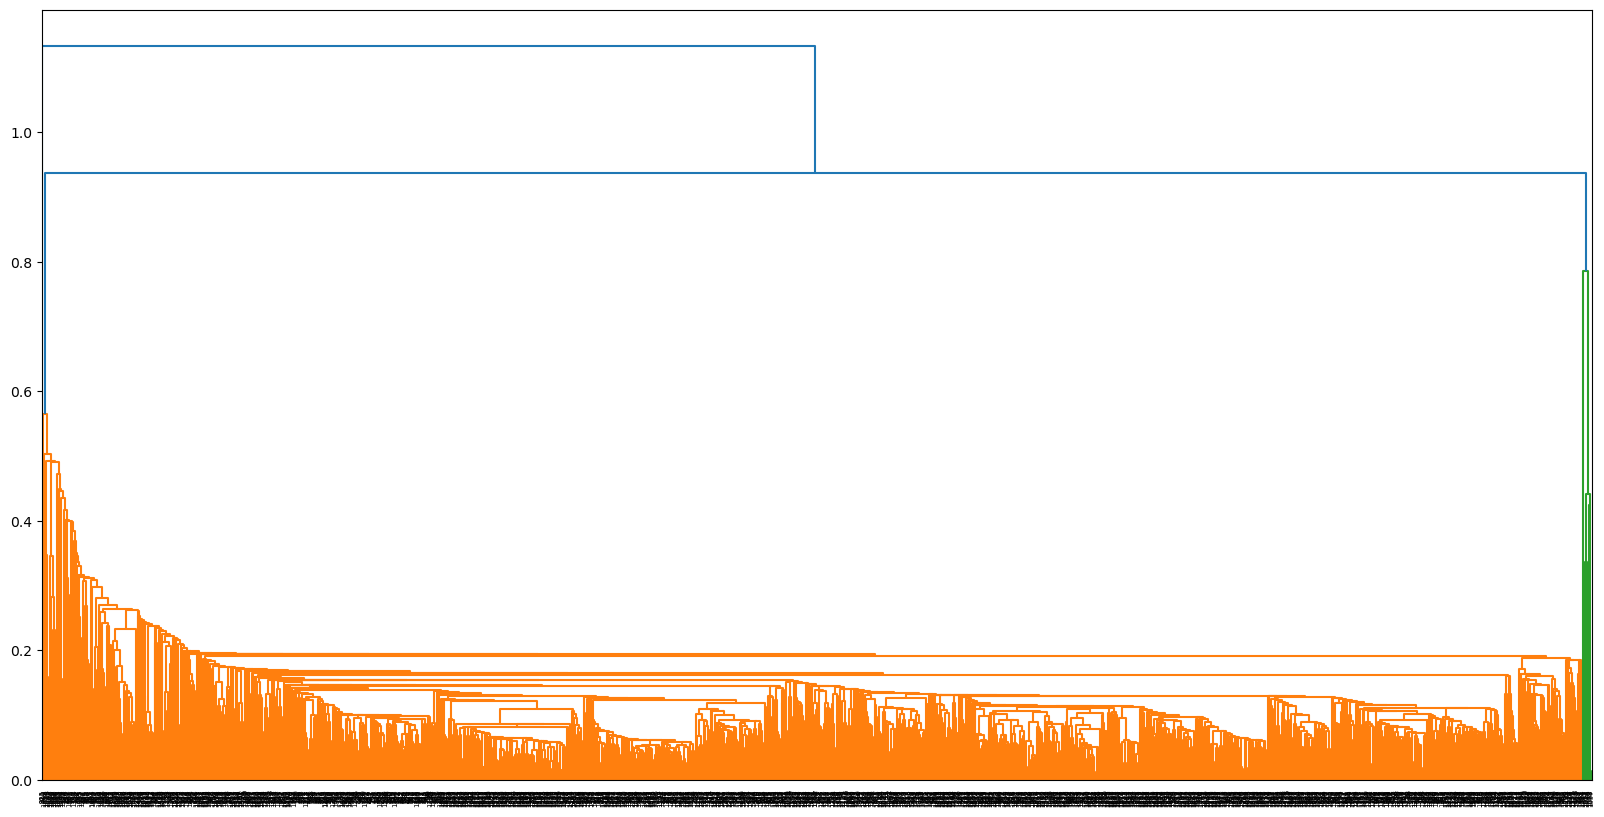

In [42]:
# Single linkage
# 圖片大小
plt.figure(figsize=(20, 10))
# 單連結、歐氏距離
mergings = linkage(mds_trans, method='single', metric= 'euclidean')
dendrogram(mergings)
plt.show()

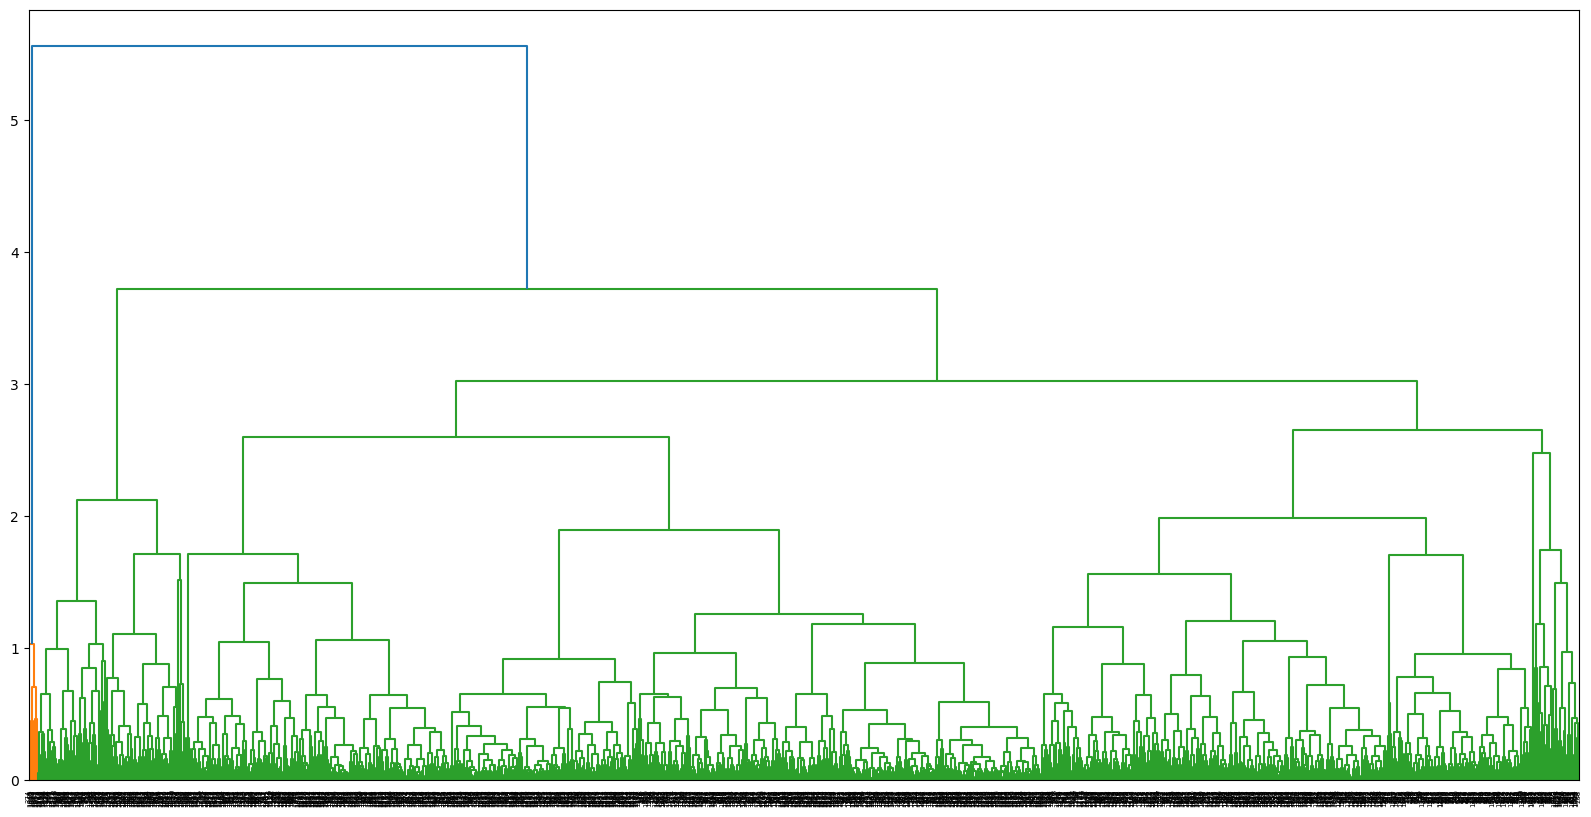

In [43]:
# Average linkage
plt.figure(figsize=(20, 10))
# 平均鏈接、歐氏距離
mergings = linkage(mds_trans, method='average', metric='euclidean')
dendrogram(mergings)
plt.show()

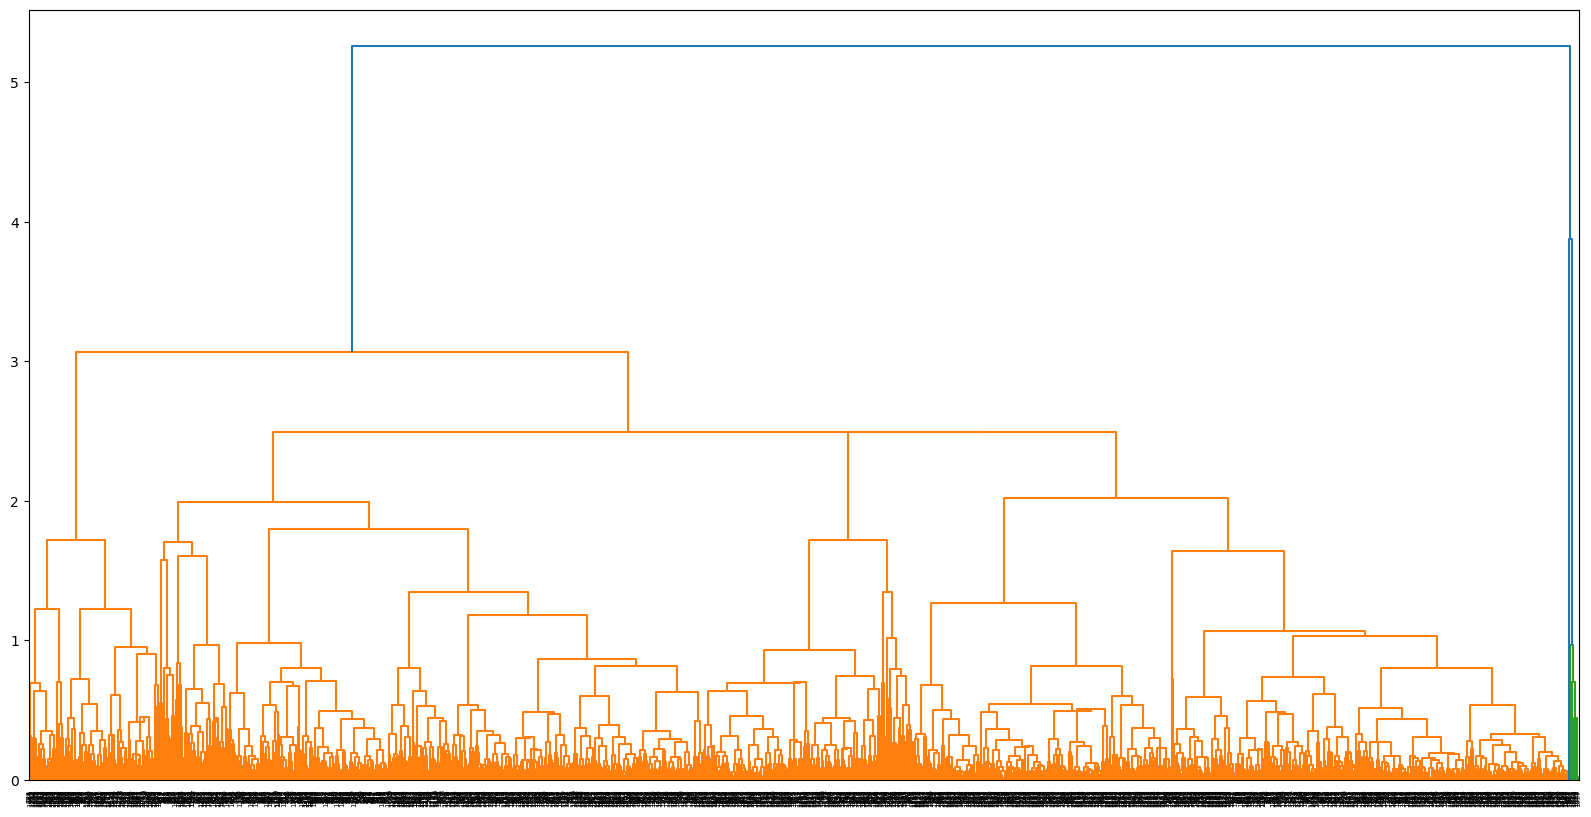

In [44]:
# Centroid linkage
plt.figure(figsize = (20,10))
# 中心鏈接、歐氏距離
mergings = linkage(mds_trans, method='centroid', metric='euclidean')
dendrogram(mergings)
plt.show()

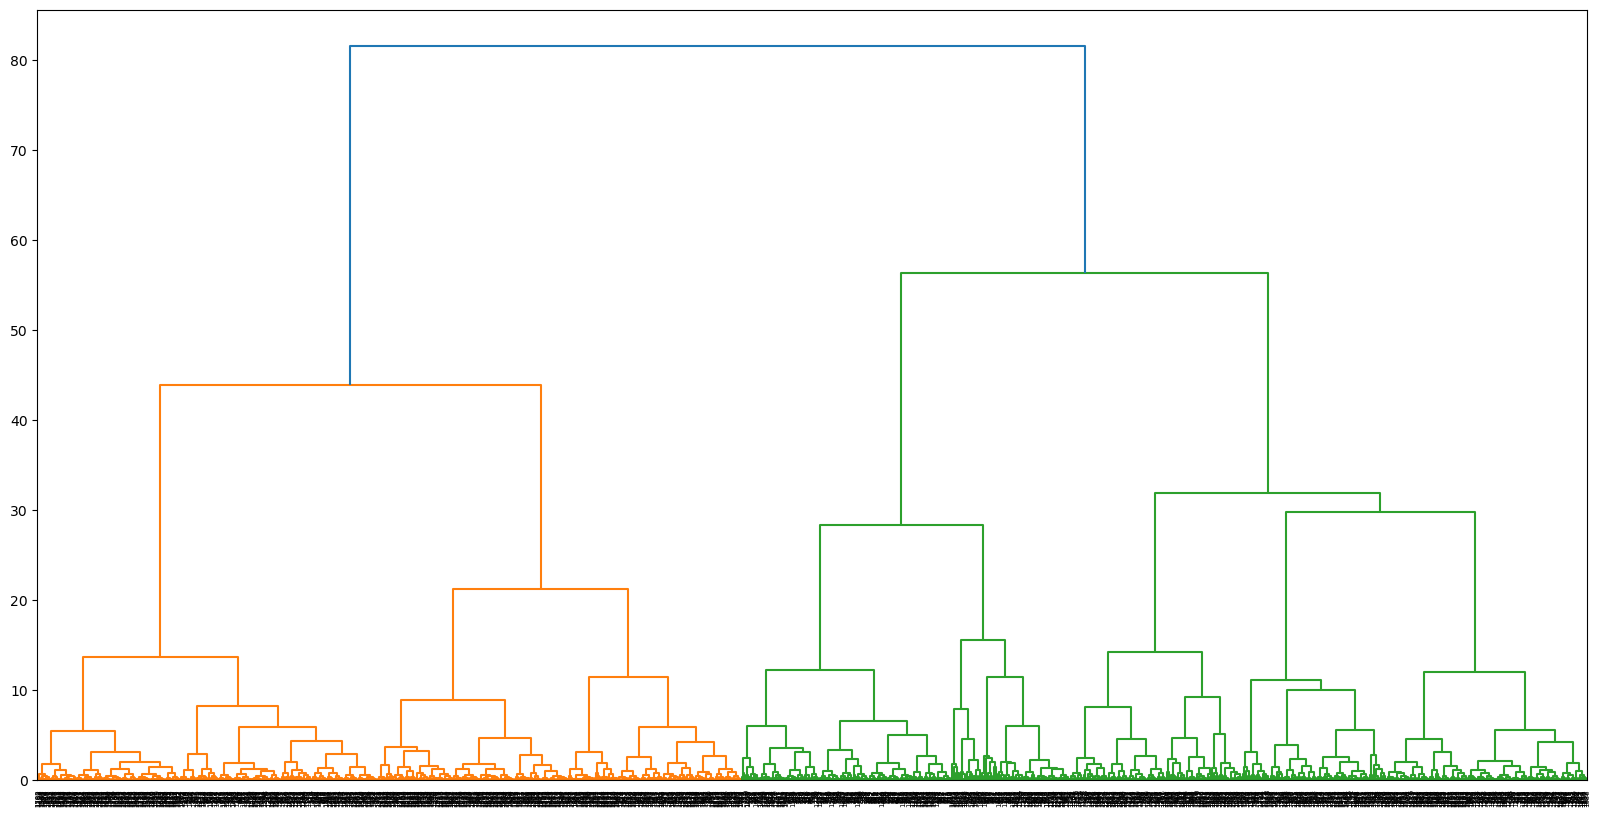

In [45]:
# Ward method
plt.figure(figsize = (20,10))
mergings = linkage(mds_trans, method='ward',metric='euclidean')
dendrogram(mergings)
plt.show()

In [46]:
# 3 clusters
h_cluster = cut_tree(mergings, n_clusters=3).reshape(-1, )

In [47]:
pred = pd.DataFrame(h_cluster, columns=['h_cluster'])
hierarchy_result = pd.concat([df_encoded.reset_index(drop=True), pred], axis=1)
hierarchy_result

,Age,Income,Sex_0,Sex_1,Marital status_0,Marital status_1,Education_0,Education_1,Education_2,Education_3,Occupation_0,Occupation_1,Occupation_2,Settlement size_0,Settlement size_1,Settlement size_2,h_cluster
0,2.653614,0.097524,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0
1,-1.187132,0.782654,0,1,0,1,0,1,0,0,0,1,0,0,0,1,1
2,1.117316,-0.833202,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0
3,0.775916,1.328386,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0
4,1.458716,0.736932,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.946616,0.067471,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0
1996,-0.760382,-0.084265,0,1,0,1,0,1,0,0,0,1,0,1,0,0,1
1997,-0.418983,-0.906957,1,0,1,0,1,0,0,0,1,0,0,1,0,0,1
1998,-1.016432,-0.603329,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1


In [48]:
pred.value_counts()

h_cluster
1            909
0            668
2            423
dtype: int64

In [49]:
hierarchy_result.groupby(['h_cluster'], as_index=True).mean()

,Age,Income,Sex_0,Sex_1,Marital status_0,Marital status_1,Education_0,Education_1,Education_2,Education_3,Occupation_0,Occupation_1,Occupation_2,Settlement size_0,Settlement size_1,Settlement size_2
h_cluster,,,,,,,,,,,,,,,,
0,0.986352,0.184673,0.703593,0.296407,0.696108,0.303892,0.043413,0.550898,0.368263,0.037425,0.229042,0.678144,0.092814,0.443114,0.312874,0.244012
1,-0.603391,-0.607323,0.282728,0.717272,0.275028,0.724972,0.104510,0.878988,0.014301,0.002200,0.519252,0.471947,0.008801,0.732673,0.169417,0.097910
2,-0.260995,1.013464,0.848700,0.151300,0.690307,0.309693,0.385343,0.517730,0.075650,0.021277,0.018913,0.546099,0.434988,0.063830,0.427896,0.508274


### 第一群 屬於經濟地位較中等的人
- 年齡較高
- 收入相對低
- 男性較多
- 單身較多
- 教育程度以高中 大學為主
- 職業以skilled employee / official為主
- 居住城市以小城市較多

### 第二群 屬於經濟地位較低的人
- 年齡較低
- 收入較低
- 女性較多
- 非單身為主
- 教育程度以高中為主
- 職業以失業 / unskilled、skilled employee / official為主
- 居住城市以小城市為主

### 第三群 屬於經濟地位較高的人
- 年齡較低
- 收入較高
- 男性較多
- 單身較多
- 教育程度以高中為主
- 職業以skilled employee / official、management / self-employed / highly qualified employee / officer為主
- 居住城市以大城市為主